In [ ]:
BASE = None # DEFINE IT!

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
import numpy as np

In [2]:
%matplotlib inline 

In [3]:
steps = [1, 10, 100]
methods = [0, 1, 2, 3, 4, 5]

In [4]:
def get_path(step, method):
    return BASE + r"\two_body_step{0}_method{1}.csv".format(step, method)

In [65]:
data = {}
for step in steps: 
    items = {}
    for method in methods: 
        df = pd.read_csv(get_path(step, method))
        b1 = df[df.label == 'Body 1'].copy()
        b2 = df[df.label == 'Body 2'].copy()        
        items[method] = {'b1': b1, 'b2': b2}
    data[step] = items

In [66]:
for step in steps: 
    for method in methods:         
        b1 = data[step][method]['b1']
        b2 = data[step][method]['b2']
        b1["orbital_velocity"] = 0.204240972872732
        b2["orbital_velocity"] = 0.612722918618196
        b1["orbit_radius"] = 1e+8
        b2["orbit_radius"] = 3e+8

In [73]:
for step in steps: 
    for method in methods: 
        b1 = data[step][method]['b1']
        b2 = data[step][method]['b2']

        b1['expected_x_km'] = -b1.orbit_radius * np.cos(b1.orbital_velocity * b1.epoch_millis / 1000.0 / b1.orbit_radius)
        b1['expected_y_km'] = -b1.orbit_radius * np.sin(b1.orbital_velocity * b1.epoch_millis / 1000.0 / b1.orbit_radius)

        b2['expected_x_km'] = b2.orbit_radius * np.cos(b2.orbital_velocity * b2.epoch_millis / 1000.0 / b2.orbit_radius)
        b2['expected_y_km'] = b2.orbit_radius * np.sin(b2.orbital_velocity * b2.epoch_millis / 1000.0 / b2.orbit_radius)
        

In [74]:
for step in steps: 
    for method in methods:         
        for b in ['b1', 'b2']: 
            df = data[step][method][b]
            df['error'] = np.power(\
                                   np.power(df.location_x_km - df.expected_x_km, 2.0) + \
                                   np.power(df.location_y_km - df.expected_y_km, 2.0), \
                                   0.5 \
                                  )        

In [75]:
for step in steps: 
    for method in methods:         
        for b in ['b1', 'b2']: 
            df = data[step][method][b]      
            df['actual_velocity'] = np.power(\
                                   np.power(df.velocity_x_kms, 2.0) + \
                                   np.power(df.velocity_y_kms, 2.0), \
                                   0.5 \
                                    )
            df['velocity_error'] = df.orbital_velocity - df.actual_velocity                

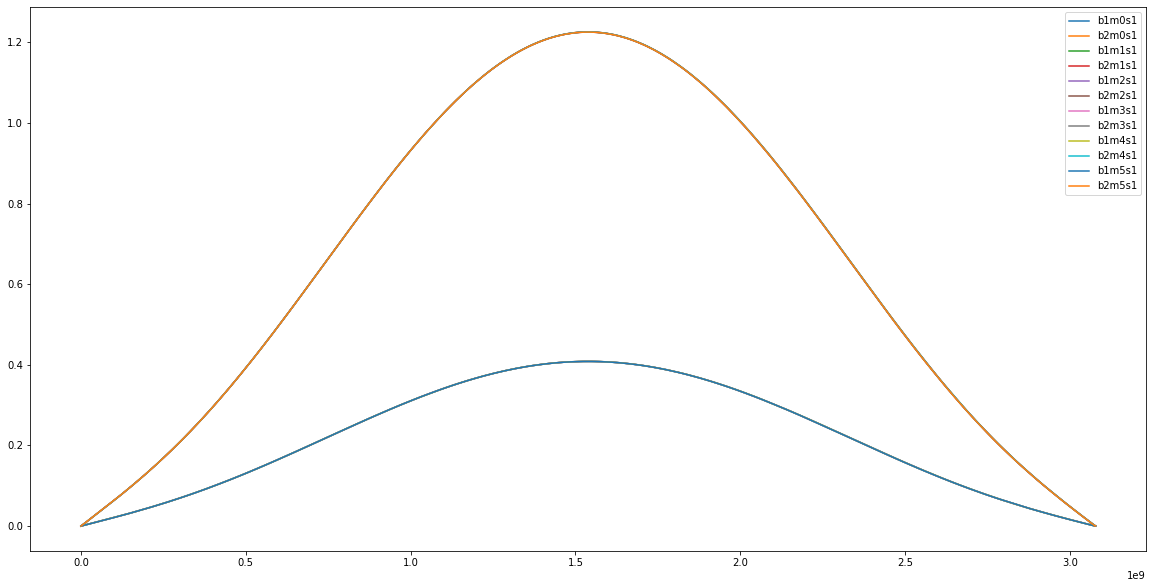

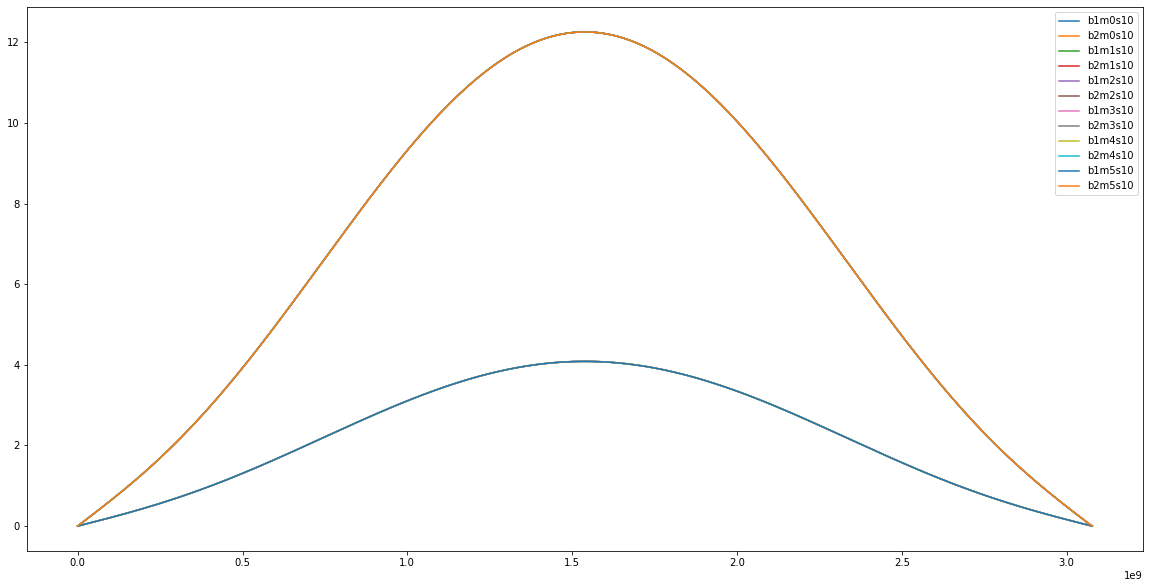

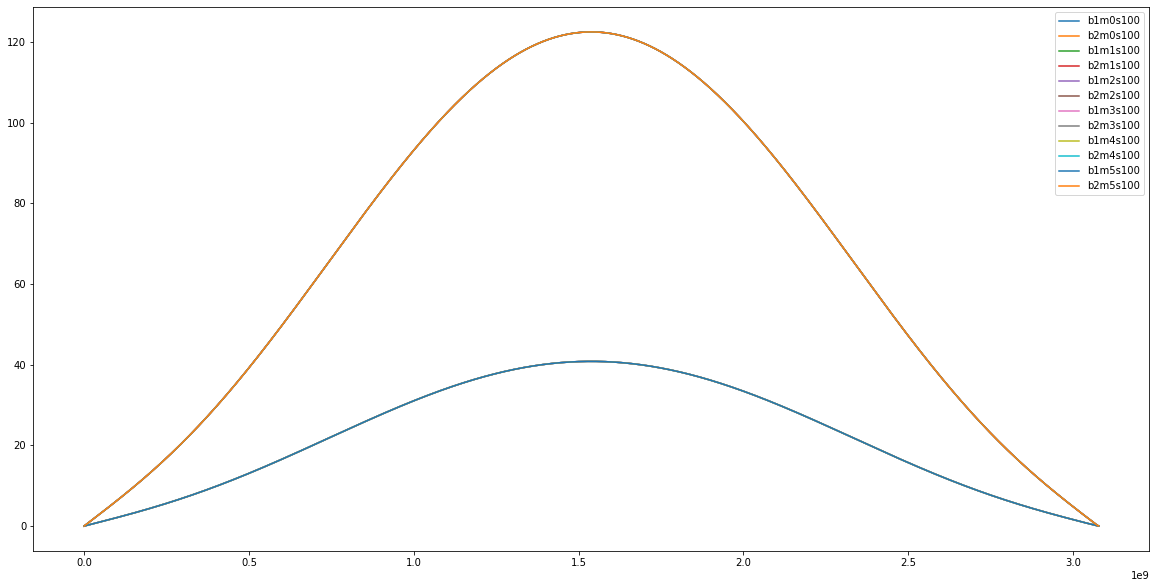

In [79]:

for step in steps: 
    plt.figure(figsize=(20, 10))

    for method in methods: 
        b1 = data[step][method]['b1']
        b2 = data[step][method]['b2']
        plt.plot(b1.epoch_millis / 1000.0, b1.error, label='b1m' + str(method) + 's' + str(step))
        plt.plot(b2.epoch_millis / 1000.0, b2.error, label='b2m' + str(method) + 's' + str(step))
    
    plt.legend()
1;

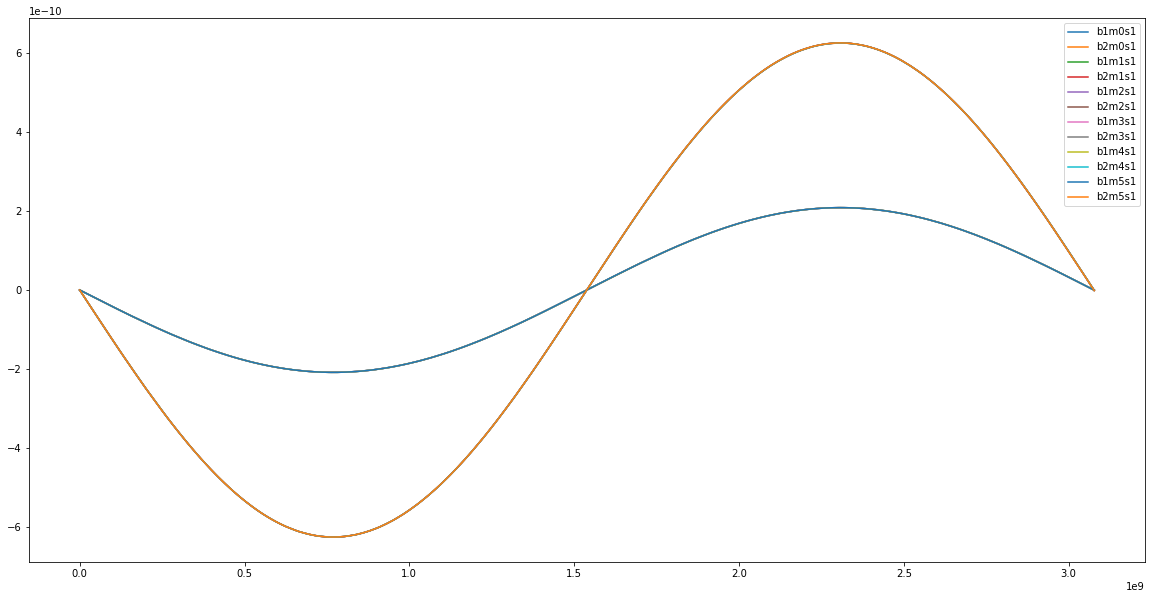

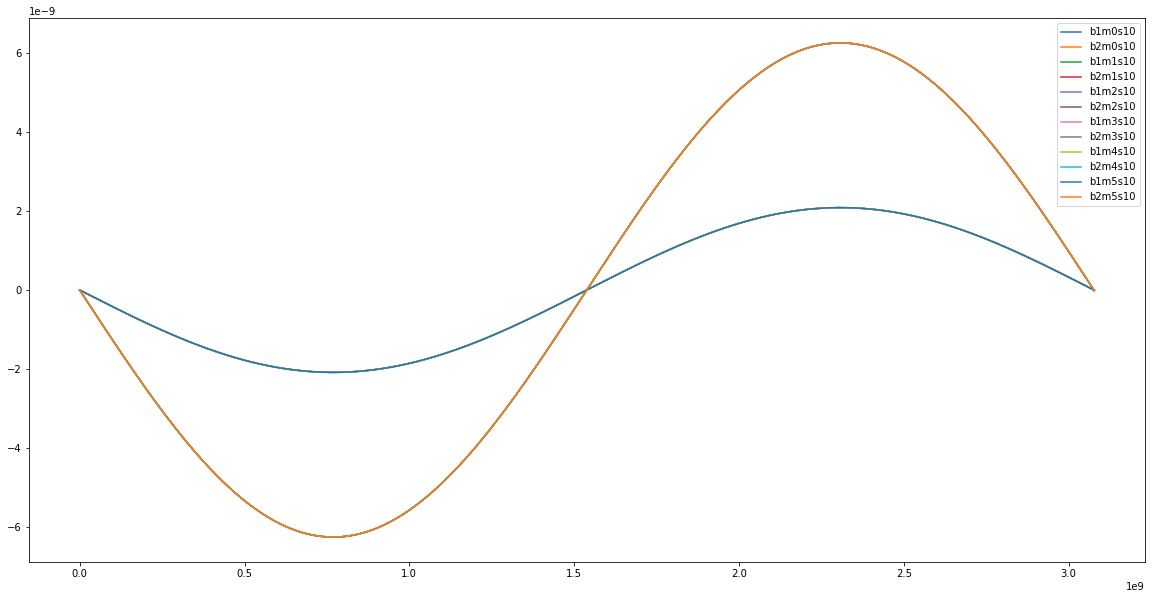

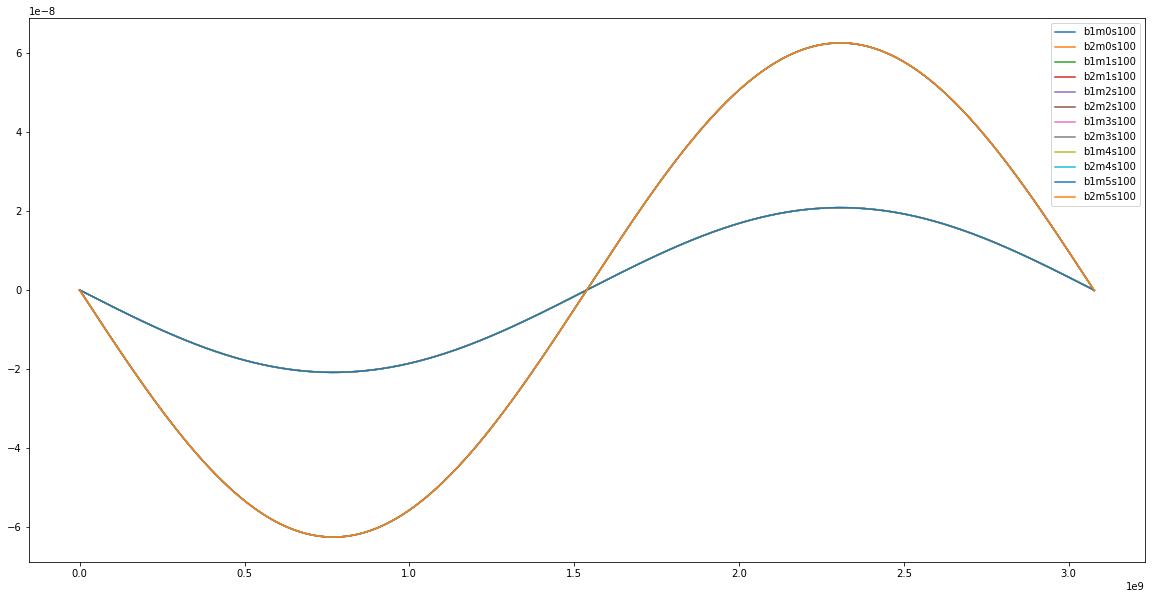

In [80]:

for step in steps: 
    plt.figure(figsize=(20, 10))

    for method in methods: 
        b1 = data[step][method]['b1']
        b2 = data[step][method]['b2']
        plt.plot(b1.epoch_millis / 1000.0, b1.velocity_error, label='b1m' + str(method) + 's' + str(step))
        plt.plot(b2.epoch_millis / 1000.0, b2.velocity_error, label='b2m' + str(method) + 's' + str(step))
    
    plt.legend()
1;